In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('A_stat_data_112.csv')
df2 = df.copy()

In [3]:
df_DiffAndPass = df2[['first_correct_rate', 'mission_difficulty','grade']].dropna()
df_DiffAndPass.head()

,first_correct_rate,mission_difficulty,grade
10,0.0,易,5
11,0.4,中,5
40,0.2,難,5
64,0.2,難,7
65,0.4,難,7


In [4]:
unique_grades = df_DiffAndPass['grade'].unique()
unique_grades.sort()
print("不同的年級有：", unique_grades)

不同的年級有： [4 5 6 7 8 9]


In [5]:
df_grades = {}

# 遍歷年級列表，生成對應的 DataFrame
for grade in unique_grades:
    df_grades[f"{grade}年級"] = df_DiffAndPass[df_DiffAndPass['grade'] == grade]

# 列出生成的字典
for grade, df in df_grades.items():
    print(f"{grade} 的數據:")
    print(df)
    print("\n")


4年級 的數據:
         first_correct_rate mission_difficulty  grade
862                     0.6                  易      4
1091                    0.4                  難      4
1151                    0.8                  中      4
1164                    0.2                  中      4
1232                    0.6                  中      4
...                     ...                ...    ...
1900255                 0.2                  易      4
1900258                 0.2                  中      4
1900263                 0.4                  中      4
1900282                 0.8                  易      4
1900286                 0.4                  難      4

[132420 rows x 3 columns]


5年級 的數據:
         first_correct_rate mission_difficulty  grade
10                      0.0                  易      5
11                      0.4                  中      5
40                      0.2                  難      5
729                     0.2                  中      5
733                     0.6        

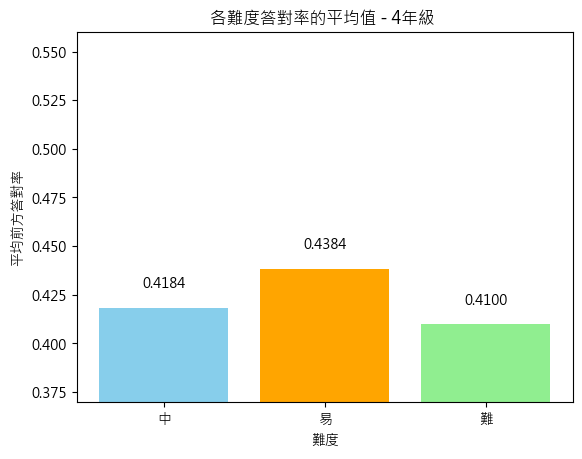

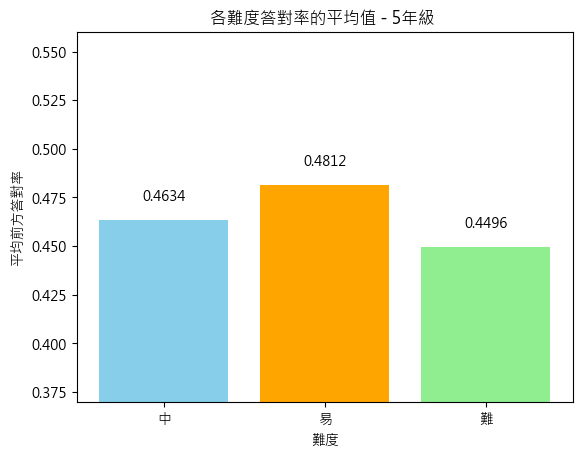

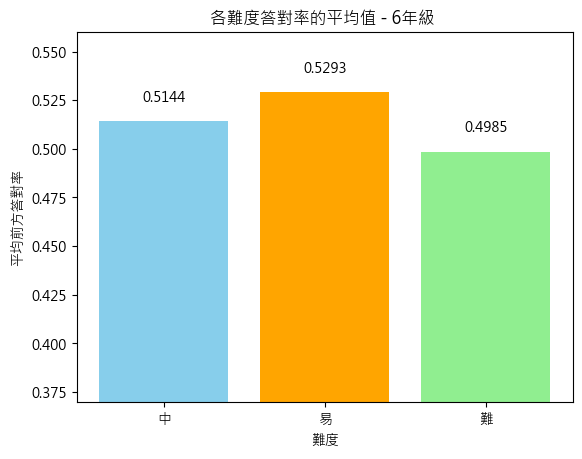

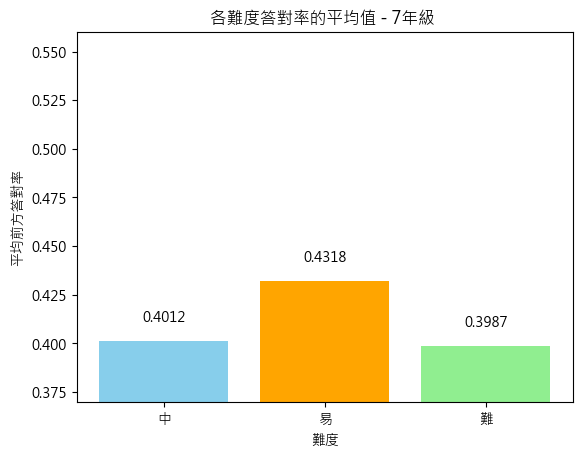

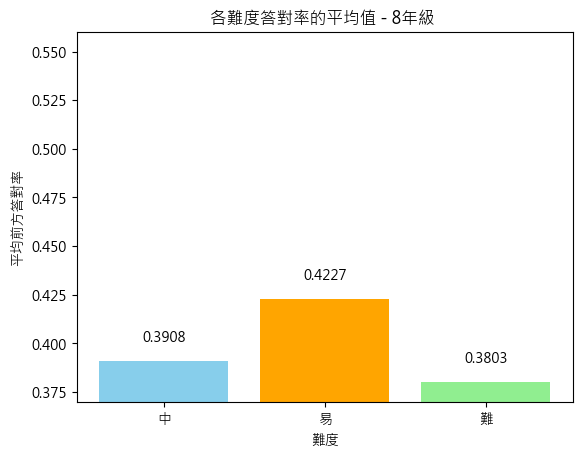

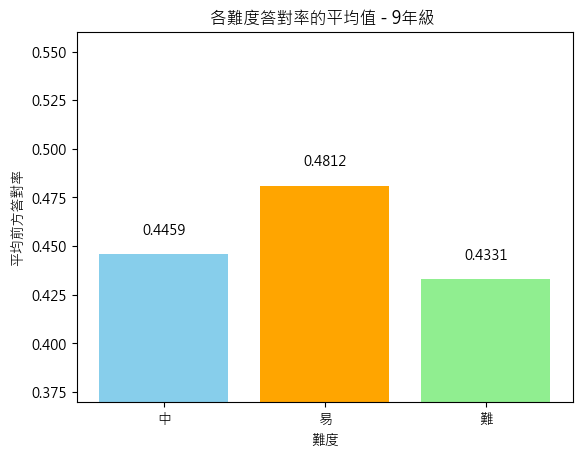

In [6]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'Microsoft YaHei']  # 設定字體
plt.rcParams['axes.unicode_minus'] = False  # 解決負號顯示問題
for grade, df in df_grades.items():
    # 計算每個難度的 first_correct_rate 平均值
    avg_correct_rate = df.groupby('mission_difficulty')['first_correct_rate'].mean()

    # 繪製柱狀圖
    plt.bar(avg_correct_rate.index, avg_correct_rate.values, color=['skyblue', 'orange', 'lightgreen'])
    plt.title(f"各難度答對率的平均值 - {grade} ")
    plt.xlabel("難度")
    plt.ylabel("平均前方答對率")

    # 設定 y 軸的範圍 0.37 到 0.56
    plt.ylim(0.37, 0.56)

    # 顯示每個柱狀圖的精確值
    for i, v in enumerate(avg_correct_rate):
        plt.text(i, v + 0.01, f"{v:.4f}", ha='center')  # 小數點保留後四位

    plt.show()